In dit experiment gaan we de gistcellen detecteren in een beeld met als doel om die ook te tellen. Hiervoor gebruiken we een aantal Python bibliotheken die we eerst moeten initialiseren.

In [79]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data

Uit de verzameling testbeelden die bij skimage horen laden we er eentje in. 
Het is een goede gewoonte om altijd je data te inspecteren voor je verder gaat.

image has size (512, 512) and looks like this:


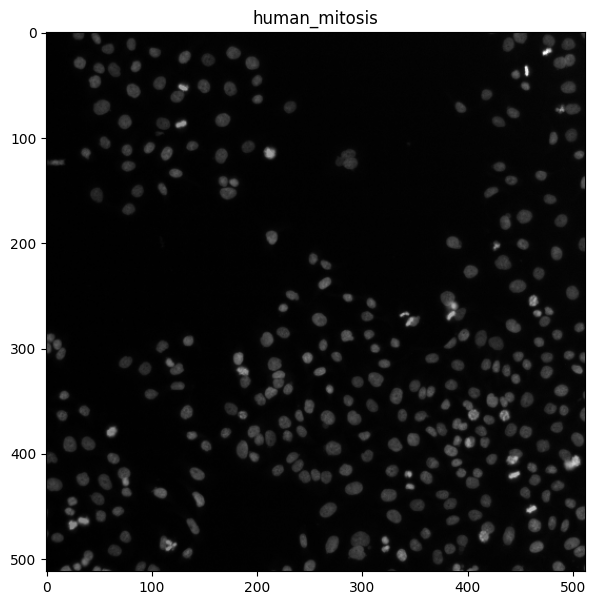

In [80]:
# code block to load images
# -------------------------
import imageio.v2 as iio
import numpy as np

# use online image that can be thresholded
name = 'human_mitosis'
caller = getattr(data, name)
image = caller()

# use screenshot that requires template matching
#color_image = iio.imread("gist_factor100_grey.png")
#image = np.mean(color_image, axis=2)

print('image has size ' + str(image.shape) + ' and looks like this:')
plt.figure(figsize=(7,7))
plt.title(name)
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In dit geval gaat het over een grijswaardenbeeld waarvan je de afmeting kan zien boven het beeld, en elke pixelwaarde heeft een bereik van 0 tot 255 (8 bits of 1 byte).
De cellen worden weergegeven door heldere ellipsvormige objecten op een donkere achtergrond. Om beter in te zien welke grijswaarden voorkomen in het beeld stellen we een histogram op met de verdeling van de grijswaarden over het beeld.

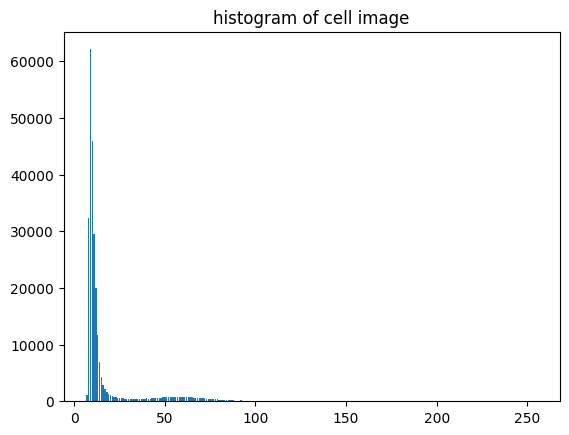

In [81]:
# code block to show histogram
# ----------------------------
import skimage as ski
from skimage.exposure import histogram
hist, hist_centers = ski.exposure.histogram(image)
plt.title('histogram of cell image')
plt.bar(hist_centers,hist)
plt.show()

Hieruit zien we dat er zeer veel donkere pixels zijn met een lage pixelwaarde. Hiervan kunnen we veronderstellen dat dat de achtergrondpixels zijn. De pixels die cellen voorstellen lijken mooi verdeeld te zijn. Laten we eerst even inzoomen in het gebied rond de cellen.

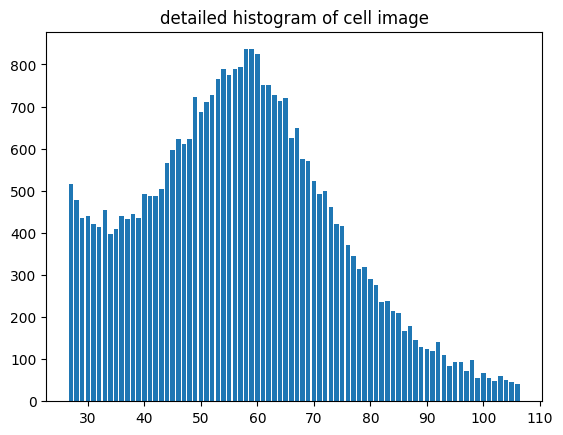

In [82]:
# code block to zoom in on histogram
# ----------------------------------
min_cell_greyvalue = 20
max_cell_greyvalue = 100
plt.title('detailed histogram of cell image')
plt.bar(hist_centers[min_cell_greyvalue:max_cell_greyvalue],hist[min_cell_greyvalue:max_cell_greyvalue])
plt.show()

Als je een paar waarden invult in de code hierboven kan je de verdeling van de grijswaarden inspecteren. Druk na elke wijziging op de 'play' knop bovenaan, of gebruik Shift-Enter.

Misschien kunnen we de cellen al detecteren op basis van de grijswaarden met een eenvoudige threshold functie. Laten we dat eens proberen.

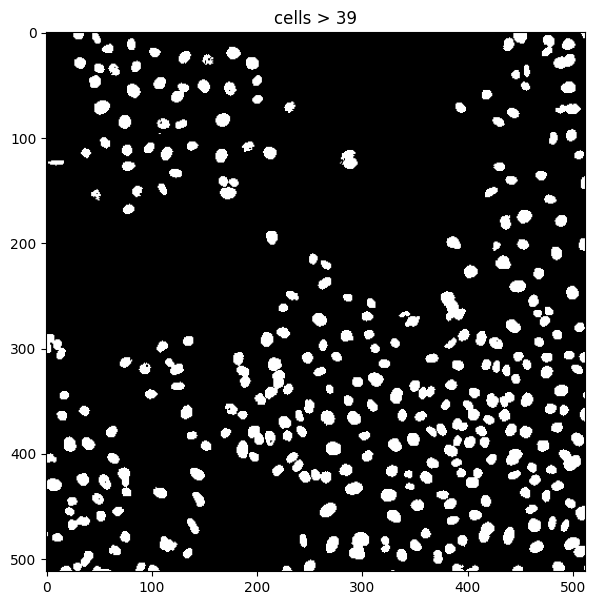

In [83]:
# code block to show thresholded image
# ------------------------------------
threshold_value = 39
plt.figure(figsize=(7,7))
plt.imshow(image > threshold_value, cmap=plt.cm.gray)
plt.title('cells > ' + str(threshold_value))
plt.show()

Dit lijkt min of meer te werken. Laten we eens proberen of we het aantal witte blobs kunnen tellen.

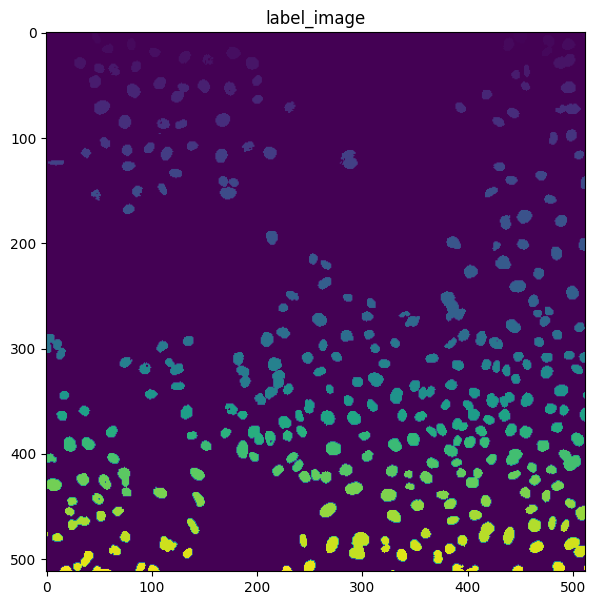

Maximum label value is 295


In [84]:
# code block to threshold the image and label all the blobs
# ---------------------------------------------------------
from skimage.measure import label, regionprops

label_image = label(image > threshold_value)
plt.figure(figsize=(7,7))
plt.imshow(label_image)
plt.title('label_image')
plt.show()
print('Maximum label value is '+ str(label_image.max()))

Maar nu zijn ook hele kleine delen van het beeld meegeteld die waarschijnlijk alleen maar ruis voorstellen. Laten we eens kijken welke cellen er gedetecteerd zijn.

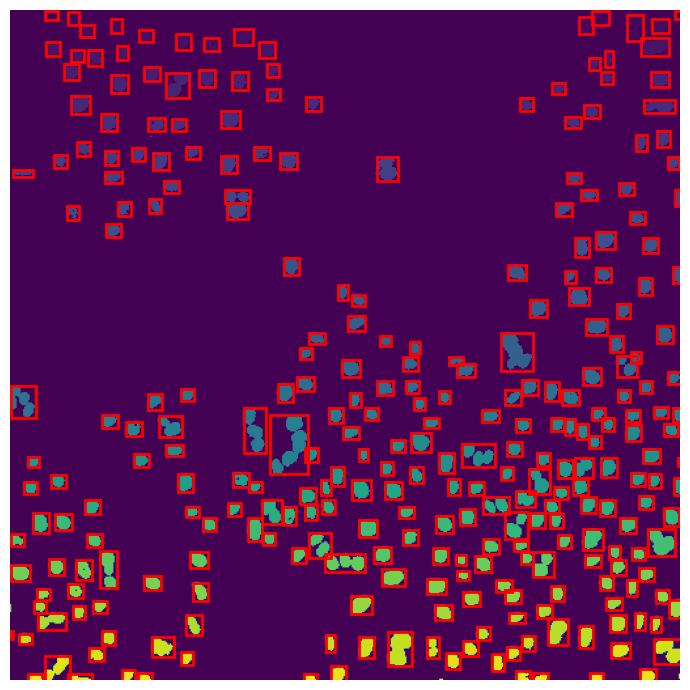

Total number of cells counted is 289


In [85]:
# code block to show bounding boxes of all detected blobs larger than a minimun size
# ----------------------------------------------------------------------------------
import matplotlib.patches as mpatches

minimum_size_cell = 10

total_numer_cells = 0

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(label_image)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= minimum_size_cell:
        # add cell counter
        total_numer_cells = total_numer_cells + 1
        
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()
print('Total number of cells counted is ' + str(total_numer_cells))

In [ ]:
We kunnen ook cellen detecteren door de afbeelding te vergelijken met de afbeelding van een enkele cel.

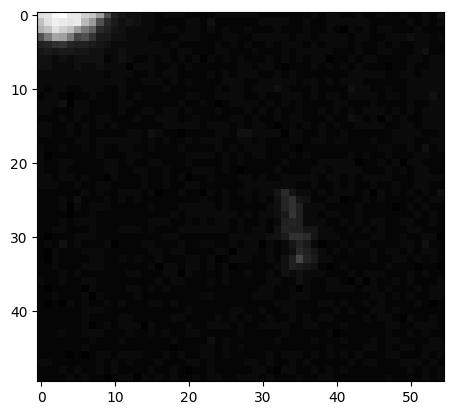

In [86]:
cell = image[170:220, 75:130]
plt.imshow(cell, cmap=plt.cm.gray)
plt.show()

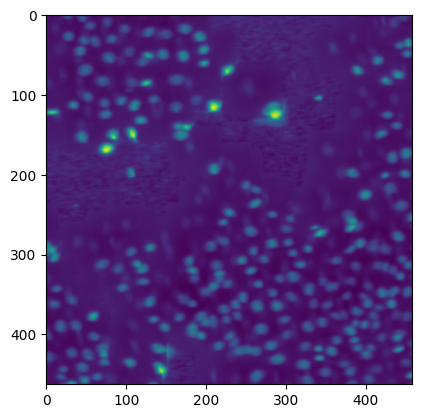

In [89]:
from skimage.feature import match_template

result = match_template(image, cell)
plt.imshow(result)
plt.show()